# **Data analysis on NBA games from 2004 to 2022**

**1.Question or problem definition.**

* Predict the outcome of an NBA game (whether the home team 0:loses or 1:wins) from features in the dataset through applying classification models.

**2.Acquire training and testing data.**

* Import the necessary modules and the dataset

In [1]:
#Fundamentals for data analysis
import numpy as np
import pandas as pd
import random as rnd

# Preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# machine learning operational models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


#machine learning classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC


# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Import the dataset

df = pd.read_csv('games_dataset.csv')
df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_Injuries,AWAY_TEAM_Injuries,HOME_TEAM_WINS
0,22/12/2022,22200477,Final,1610612740,1610612759,2022,1610612740,126,0.484,0.926,...,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,0,1,1
1,22/12/2022,22200478,Final,1610612762,1610612764,2022,1610612762,120,0.488,0.952,...,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1,0,1
2,21/12/2022,22200466,Final,1610612739,1610612749,2022,1610612739,114,0.482,0.786,...,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,3,4,1
3,21/12/2022,22200467,Final,1610612755,1610612765,2022,1610612755,113,0.441,0.909,...,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,0,1,1
4,21/12/2022,22200468,Final,1610612737,1610612741,2022,1610612737,108,0.429,1.000,...,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,6/10/2014,11400007,Final,1610612737,1610612740,2014,1610612737,93,0.419,0.821,...,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,6,5,1
26647,6/10/2014,11400004,Final,1610612741,1610612764,2014,1610612741,81,0.338,0.719,...,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,3,4,0
26648,6/10/2014,11400005,Final,1610612747,1610612743,2014,1610612747,98,0.448,0.682,...,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,8,5,1
26649,5/10/2014,11400002,Final,1610612761,1610612758,2014,1610612761,99,0.440,0.771,...,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,5,5,1


**3.Wrangle, prepare, cleanse the data.**

* Completing: No column has missed data (records with missed values all have a lot of missed values for a single record which dictate a removal), completing is not necessary
* Correcting: Remove records with null values in most columns. Also remove features that are reasonably assumed to have no effect on the dependent variable (home team loses/wins)
* Creating: Add a new column "Net injuries" to show the difference between the number of injured home and away players for games. A negative correlation between this feature and the dependent variable is hypothesized.
* Creating: Add new columns of net values for FG_PCT/FT_PCT/FG3_PCT/ast/reb/ assuming positive correlations with the dependent variable
* Converting: No categorical value for columns, converting might only be needed in terms of scaling which will be done later

In [3]:
#Drop unnecessary columns

df

df.info()

df.drop(df[df['PTS_home'] == 'No game'].index, inplace = True)

df.drop(['GAME_DATE_EST','GAME_STATUS_TEXT','HOME_TEAM_ID','VISITOR_TEAM_ID','SEASON','TEAM_ID_home','PTS_home','TEAM_ID_away','PTS_away'], axis = 1)


#Add columns of net values and drop used ones

df.rename(columns={'HOME_TEAM_Injuries': "Injuries_home",'AWAY_TEAM_Injuries':'Injuries_away' }, inplace = True) #renaming columns

df['Net_FG_PCT'] = df['FG_PCT_home'] - df['FG_PCT_away']

df['Net_FT_PCT'] = df['FT_PCT_home'] - df['FT_PCT_away']

df['Net_FG3_PCT'] = df['FG3_PCT_home'] - df['FG3_PCT_away']

df['Net_AST'] = df['AST_home'] - df['AST_away']

df['Net_REB'] = df['REB_home'] - df['REB_away']

df['Net_Injuries'] = df['Injuries_home'] - df['Injuries_away']

df

#Rearrange column names

cols = df.columns.tolist()

cols

cols = ['GAME_ID',
        'HOME_TEAM_WINS',
        'FG_PCT_home','FG_PCT_away','Net_FG_PCT',
        'FT_PCT_home','FT_PCT_away','Net_FT_PCT',
        'FG3_PCT_home','FG3_PCT_away','Net_FG3_PCT',
        'AST_home','AST_away', 'Net_AST',
        'REB_home','REB_away','Net_REB',
        'Injuries_home', 'Injuries_away', 'Net_Injuries'] #rearranging column order of df

df_clean = df[cols]

df_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GAME_DATE_EST       26651 non-null  object 
 1   GAME_ID             26651 non-null  int64  
 2   GAME_STATUS_TEXT    26651 non-null  object 
 3   HOME_TEAM_ID        26651 non-null  int64  
 4   VISITOR_TEAM_ID     26651 non-null  int64  
 5   SEASON              26651 non-null  int64  
 6   TEAM_ID_home        26651 non-null  int64  
 7   PTS_home            26651 non-null  object 
 8   FG_PCT_home         26552 non-null  float64
 9   FT_PCT_home         26552 non-null  float64
 10  FG3_PCT_home        26552 non-null  float64
 11  AST_home            26552 non-null  float64
 12  REB_home            26552 non-null  float64
 13  TEAM_ID_away        26651 non-null  int64  
 14  PTS_away            26552 non-null  float64
 15  FG_PCT_away         26552 non-null  float64
 16  FT_P

,GAME_ID,HOME_TEAM_WINS,FG_PCT_home,FG_PCT_away,Net_FG_PCT,FT_PCT_home,FT_PCT_away,Net_FT_PCT,FG3_PCT_home,FG3_PCT_away,Net_FG3_PCT,AST_home,AST_away,Net_AST,REB_home,REB_away,Net_REB,Injuries_home,Injuries_away,Net_Injuries
0,22200477,1,0.484,0.478,0.006,0.926,0.815,0.111,0.382,0.321,0.061,25.0,23.0,2.0,46.0,44.0,2.0,0,1,-1
1,22200478,1,0.488,0.561,-0.073,0.952,0.765,0.187,0.457,0.333,0.124,16.0,20.0,-4.0,40.0,37.0,3.0,1,0,1
2,22200466,1,0.482,0.470,0.012,0.786,0.682,0.104,0.313,0.433,-0.120,22.0,20.0,2.0,37.0,46.0,-9.0,3,4,-1
3,22200467,1,0.441,0.392,0.049,0.909,0.735,0.174,0.297,0.261,0.036,27.0,15.0,12.0,49.0,46.0,3.0,0,1,-1
4,22200468,0,0.429,0.500,-0.071,1.000,0.773,0.227,0.378,0.292,0.086,22.0,20.0,2.0,47.0,47.0,0.0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,11400007,1,0.419,0.366,0.053,0.821,0.643,0.178,0.421,0.375,0.046,24.0,17.0,7.0,50.0,43.0,7.0,6,5,1
26647,11400004,0,0.338,0.411,-0.073,0.719,0.636,0.083,0.381,0.267,0.114,18.0,17.0,1.0,40.0,47.0,-7.0,3,4,-1
26648,11400005,1,0.448,0.387,0.061,0.682,0.659,0.023,0.500,0.500,0.000,29.0,19.0,10.0,45.0,43.0,2.0,8,5,3
26649,11400002,1,0.440,0.469,-0.029,0.771,0.725,0.046,0.333,0.385,-0.052,21.0,18.0,3.0,30.0,45.0,-15.0,5,5,0


**4.Analyze, identify patterns, and explore the data**

* Correlating and Charting: use correlation matrix to have an overview of correlations of each feature
* Correlating and Charting: Use facetgrid to explore individual features
* Findings and Hypotheses
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26552 entries, 0 to 26650
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOME_TEAM_WINS  26552 non-null  int64  
 1   FG_PCT_home     26552 non-null  float64
 2   FG_PCT_away     26552 non-null  float64
 3   Net_FG_PCT      26552 non-null  float64
 4   FT_PCT_home     26552 non-null  float64
 5   FT_PCT_away     26552 non-null  float64
 6   Net_FT_PCT      26552 non-null  float64
 7   FG3_PCT_home    26552 non-null  float64
 8   FG3_PCT_away    26552 non-null  float64
 9   Net_FG3_PCT     26552 non-null  float64
 10  AST_home        26552 non-null  float64
 11  AST_away        26552 non-null  float64
 12  Net_AST         26552 non-null  float64
 13  REB_home        26552 non-null  float64
 14  REB_away        26552 non-null  float64
 15  Net_REB         26552 non-null  float64
 16  Injuries_home   26552 non-null  int64  
 17  Injuries_away   26552 non-null 

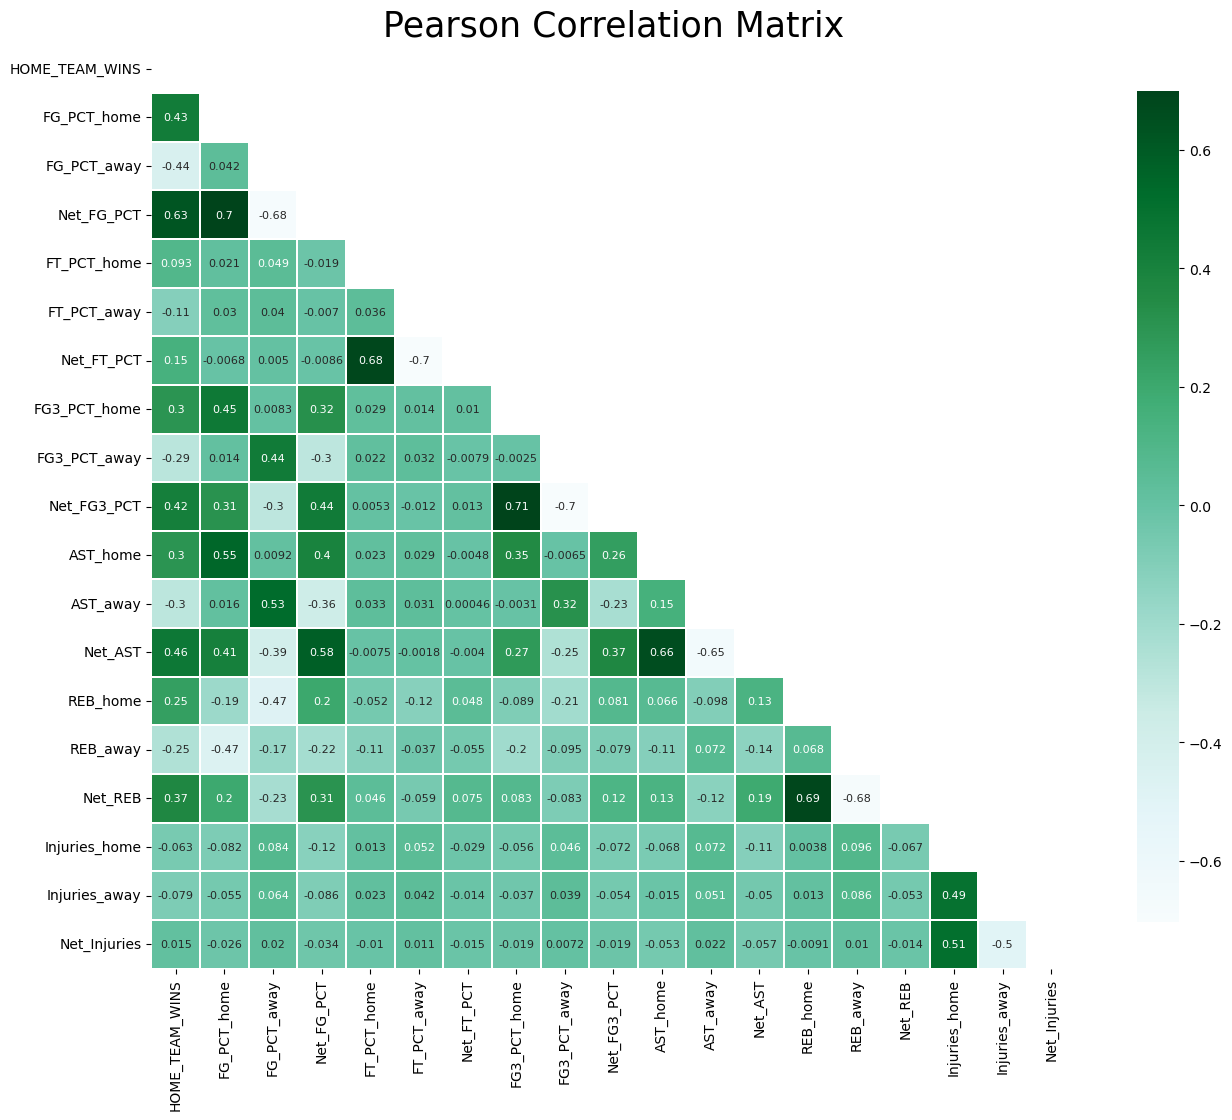

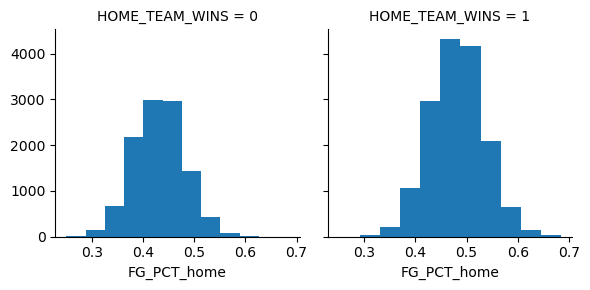

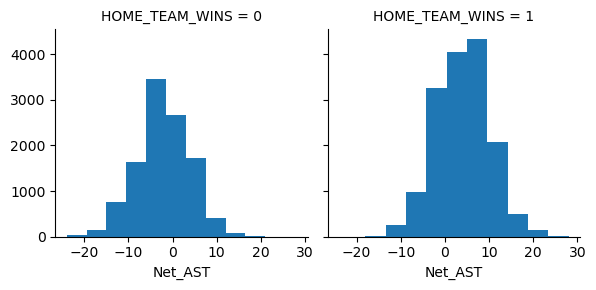

In [3]:
df_stat = df_clean.drop(['GAME_ID'], axis = 1)

df_stat.info()
df_stat.describe()

#Pearson Correlation matrix
mask = np.zeros_like(df_stat.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 
mask

mask[np.triu_indices_from(mask)]


f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_stat.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
        linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

#FacetGrid

g = sns.FacetGrid(df_stat, col='HOME_TEAM_WINS')
g.map(plt.hist, 'FG_PCT_home')
plt.show()

g = sns.FacetGrid(df_stat, col='HOME_TEAM_WINS')
g.map(plt.hist, 'Net_AST')
plt.show()

#Findings and Hypotheses

#-All net values confirmed to have positive correlation against the target variable, especially strong (>0.4) for Net_FG_PCT, Net_FG3_PCT and Net_AST
#- Net injuries was hypothesized to be negatively correlated to the feature, data suggested that it is actually a weak positive correlation.
#-Injuries of the away team has counter-intuitively a weak negative correlation to the target variable




**5.Model, predict and solve the problem.**
* X/y assignment and train-test-split
* Create a summary table 
* Apply Logistic regression / Support Factor Machine / Random Forest models with non-scaled / scaled data
* hyper-parameters (2) tuning for logistic regression / Support Vector Machine / Random Forest
* Apply tuned models with non-scaled / scaled data

In [4]:
#X y assignment, drop Game_ID now


X = df_clean.drop(['HOME_TEAM_WINS'], axis = 1)
X

y = df_clean['HOME_TEAM_WINS']
y


#train-test split
from sklearn.model_selection import train_test_split
X_model_ID, X_holdout_ID, y_model, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 21)

X_model = X_model_ID.drop(['GAME_ID'], axis = 1)

X_holdout = X_holdout_ID.drop(['GAME_ID'], axis = 1)



#Summary table

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Score':[]})

evaluation

,Model,Details,Score


In [9]:
# Building pipelines of  3 different models for non-scaled data

pipeline_lr=Pipeline([("lr_classifier",LogisticRegression())]) # the value of pipeline_lr is still a model

pipeline_svc=Pipeline([("Support Vector Machine",SVC())])

pipeline_rf=Pipeline([("Random Forest",RandomForestClassifier(n_estimators=100))])

pipeline_rf

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_svc, pipeline_rf]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "Logsitic regression", 1: "Support Vector Machines", 2: "Random Forest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_model, y_model) #pipeline objects can be fitted as if a model like KNN/Ridge


#Showing the scoring for all models   
    

for i, model in enumerate(pipelines): #enumerate returns (a) The count of the current iteration that starts at 0 and (b)the value of the item at the current iteration
    r = evaluation.shape[0]
    score = model.score(X_holdout, y_holdout)
    evaluation.loc[r] = [pipe_dict[i],'non-scaled',score]
    
evaluation

C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Details,Score
0,Logsitic regression,non-scaled,0.835059
1,Support Vector Machines,non-scaled,0.754660
2,Random Forest,non-scaled,0.835812


In [ ]:
#hyper-parameter (2) tuning for logistic regression / SVC / Random Forest

#**logistic regression - solver and C as the hyper-parameters to be tuned

solver_values = ['newton-cg', 'lbfgs', 'liblinear']

C_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = {'solver':solver_values, 'C': C_values}

# Instantiate the classifier
logreg = LogisticRegression()

# Instantiate the GridSearchCV object:
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


#**Support Vector Machines - kernel and C as the hyper-parameters to be tuned

kernel_values = ['poly', 'rbf', 'sigmoid']

C_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = {'kernel': kernel_values, 'C': C_values}

# Instantiate the classifier
from sklearn.svm import SVC, LinearSVC
SVC = SVC()

# Instantiate the GridSearchCV object:
SVC_cv = RandomizedSearchCV(SVC, param_grid, cv=5)

# Fit it to the data
SVC_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Support Vector Machines Parameters: {}".format(SVC_cv.best_params_)) 
print("Best score is {}".format(SVC_cv.best_score_))



#**Random Forest - max_features and n_estimators as the hyper-parameters to be tuned

max_features_values = np.arange(1,21)

max_features_values

n_estimators_values = [10,100,1000]

param_grid = {'max_features': max_features_values, 'n_estimators': n_estimators_values}


# Instantiate the classifier
Ranfo = RandomForestClassifier()

# Instantiate the GridSearchCV object:
Ranfo_cv = RandomizedSearchCV(Ranfo, param_grid, cv=5)

# Fit it to the data
Ranfo_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Ranfo_cv.best_params_)) 
print("Best score is {}".format(Ranfo_cv.best_score_))

C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm di

C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm di

Tuned Logistic Regression Parameters: {'solver': 'newton-cg', 'C': 10}
Best score is 0.8396725057364153


In [ ]:
# After tuning - Building pipelines of  3 different tuned models for non-scaled data

pipeline_lr=Pipeline([("lr_classifier",LogisticRegression(solver = 'lbfgs' , C = 100))]) # the value of pipeline_lr is still a model

pipeline_svc=Pipeline([("Support Vector Machine",SVC(kernel = 'poly', C = 100))])

pipeline_rf=Pipeline([("Random Forest",RandomForestClassifier(max_features = "sqrt", n_estimators=200),)])

pipeline_rf

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_svc, pipeline_rf]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "Logsitic regression", 1: "Support Vector Machines", 2: "Random Forest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_model, y_model) #pipeline objects can be fitted as if a model like KNN/Ridge

#Showing the scoring for all models   
    

for i, model in enumerate(pipelines): #enumerate returns (a) The count of the current iteration that starts at 0 and (b)the value of the item at the current iteration
    r = evaluation.shape[0]
    score = model.score(X_holdout, y_holdout)
    evaluation.loc[r] = [pipe_dict[i],'tuned, non-scaled',score]
    
evaluation



C:\Users\Asus\Documents\Data_Analysis\Python\Python_data_scienece_25hrs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# After tuning - Building pipelines of  3 different tuned models for scaled data

pipeline_lr=Pipeline([("scalar1",StandardScaler()),("lr_classifier",LogisticRegression(solver = 'lbfgs' , C = 100))]) # the value of pipeline_lr is still a model

pipeline_svc=Pipeline([("scalar2",StandardScaler()),("Support Vector Machine",SVC(kernel = 'poly', C = 100))])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),("Random Forest",RandomForestClassifier(max_features ="sqrt" , n_estimators=200))])

pipeline_rf

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_svc, pipeline_rf]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "Logsitic regression", 1: "Support Vector Machine", 2: "Random Forest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_model, y_model) #pipeline objects can be fitted as if a model like KNN/Ridge


#Showing the scoring for all models   
    

for i, model in enumerate(pipelines): #enumerate returns (a) The count of the current iteration that starts at 0 and (b)the value of the item at the current iteration
    r = evaluation.shape[0]
    score = model.score(X_holdout, y_holdout)
    evaluation.loc[r] = [pipe_dict[i],'tuned, scaled',score]
    
evaluation

    


,Model,Details,Score
0,Logsitic regression,"tuned, non-scaled",0.836942
1,Support Vector Machines,"tuned, non-scaled",0.832988
2,Random Forest,"tuned, non-scaled",0.836189
3,Logsitic regression,"tuned, non-scaled",0.836942
4,Support Vector Machines,"tuned, non-scaled",0.832988
5,Random Forest,"tuned, non-scaled",0.835812
6,Logsitic regression,"tuned, scaled",0.836566
7,Support Vector Machine,"tuned, scaled",0.827528
8,Random Forest,"tuned, scaled",0.836001
9,Logsitic regression,"tuned, scaled",0.836566


**6.Visualize, report, and present the problem solving steps and final solution.**
* Sorting and showing all scores for different models under different conditions
* Conclusion 1: After data cleaning and hyper-parameter tuning exercises, SVC with scaled data and default HYPER-parameters yielded the best score at 0.8407
* Conclusion 2: Net injuries was hypothesized to be negatively correlated to the feature, data suggested that it is actually a weak positive correlation.
* Conclusion 3: Injuries of the away team has counter-intuitively a weak negative correlation to the target variable

In [10]:
evaluation
evaluation.sort_values(by = 'Score', ascending = False)

,Model,Details,Score
0,Logsitic regression,"tuned, non-scaled",0.836942
3,Logsitic regression,"tuned, non-scaled",0.836942
6,Logsitic regression,"tuned, scaled",0.836566
9,Logsitic regression,"tuned, scaled",0.836566
2,Random Forest,"tuned, non-scaled",0.836189
8,Random Forest,"tuned, scaled",0.836001
5,Random Forest,"tuned, non-scaled",0.835812
11,Random Forest,"tuned, scaled",0.833741
1,Support Vector Machines,"tuned, non-scaled",0.832988
4,Support Vector Machines,"tuned, non-scaled",0.832988


**7.Supply or submit the results.**
* Export the best solution's prediction as a .csv file

In [11]:
pipeline_svc=Pipeline([("scalar2",StandardScaler()),("Support Vector Machine",SVC())])

pipeline_svc.fit(X_model, y_model)

pipeline_svc.score(X_holdout, y_holdout)

y_pred = pipeline_svc.predict(X_holdout)

y_pred


submission = pd.DataFrame({'GAME_ID': X_holdout_ID['GAME_ID'],
                           'Predictions':y_pred})